# Import Libraries

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [137]:
data = pd.read_csv("500_Companies.csv")
print(data.head())

     rdspend  administration  marketingspend     Profit
0  165349.20       136897.80       471784.10  192261.83
1  162597.70       151377.59       443898.53  191792.06
2  153441.51       101145.55       407934.54  191050.39
3  144372.41       118671.85       383199.62  182901.99
4  142107.34        91391.77       366168.42  166187.94


In [138]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rdspend,499.0,81553.199960,46437.414676,0.00,43442.000000,79009.0000,124593.00000,165349.20
administration,499.0,122501.243653,10943.049739,51283.14,116635.109750,122437.5621,129223.85395,182645.56
marketingspend,499.0,226136.161208,93423.719951,0.00,151481.385200,223872.4687,309595.45125,471784.10
Profit,499.0,118703.094140,39778.651016,14681.40,86463.248415,117289.0711,155471.62390,192261.83


In [139]:
data.columns

Index(['rdspend', 'administration', 'marketingspend', 'Profit'], dtype='object')

In [140]:
data.shape

(499, 4)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rdspend         499 non-null    float64
 1   administration  499 non-null    float64
 2   marketingspend  499 non-null    float64
 3   Profit          499 non-null    float64
dtypes: float64(4)
memory usage: 15.7 KB


In [142]:
data.isnull().sum()

rdspend           0
administration    0
marketingspend    0
Profit            0
dtype: int64

In [143]:
corr = data.corr()
corr

,rdspend,administration,marketingspend,Profit
rdspend,1.000000,0.626707,0.959083,0.997296
administration,0.626707,1.000000,0.532676,0.616160
marketingspend,0.959083,0.532676,1.000000,0.962120
Profit,0.997296,0.616160,0.962120,1.000000


# Visualize The Dataset

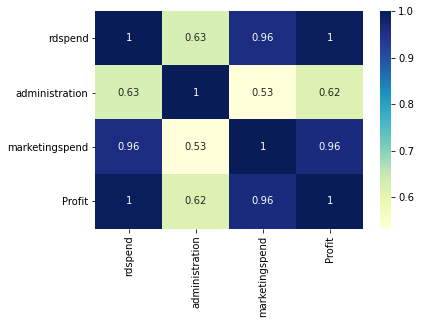

In [144]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

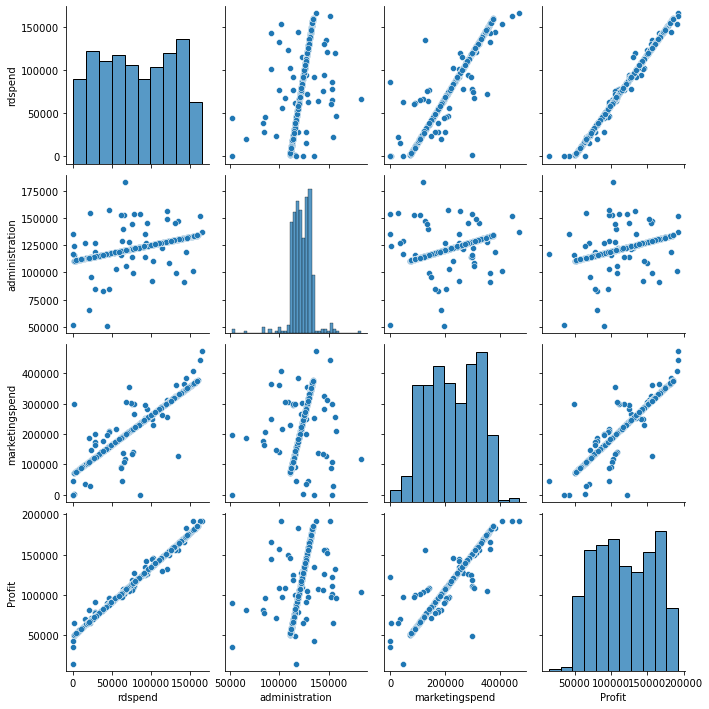

In [145]:
sns.pairplot(data)
plt.show()

# Split dataset into training set and test set

In [146]:
# Dividing input and output data to train and test data
# Training : Testing = 80 : 20
x = data.iloc[:,:-1] # which simply means take all rows and all columns except last one
y = data['Profit']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,)
print(xtrain.shape)

(399, 3)


# Fit LinearRegression Model

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [148]:
pred = model.predict(xtest)


In [149]:
testing_data_model_score = model.score(xtest, ytest)
print("Model Score/Accuracy on Testing data",testing_data_model_score)

training_data_model_score = model.score(xtrain, ytrain)
print("Model Score/Accuracy on Training data",training_data_model_score)

Model Score/Accuracy on Testing data 0.9949405860492845
Model Score/Accuracy on Training data 0.9949994117700585


# Measure Accuracy


In [150]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2Score = r2_score(pred, ytest)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 99.50276161879177


In [151]:
input_data = np.array([144372.41 , 118671.85 , 383199.62  ])

input_data_reshape = input_data.reshape(1, -1)
prediction = model.predict(input_data_reshape)
print(prediction)

[173472.20199756]


In [152]:
import pickle

In [153]:
filename = 'profit_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [154]:
# loading the saved model
loaded_model = pickle.load(open('profit_model.sav', 'rb'))